**DIABETES PREDICTION**

**IMPORTING REQUIRED LIBRARIES**

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.combine import SMOTETomek

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import pickle
import joblib
sns.set()

**Reading Data**

In [2]:

DIABETES_DATASET_PATH = '/content/diabetes (1).csv'

def load_diabetes_dataset(path: str):
    '''
    This function loads the diabetes dataset from a CSV file and returns a pandas DataFrame.

    Parameters:
    ----------
    path : str
        The path to the diabetes dataset file.

    Returns:
    -------
    pandas.DataFrame
        The diabetes dataset.

    Raises:
    -------
    FileNotFoundError
        If the file does not exist.
    '''

    try:
        diabetes_dataset = pd.read_csv(path)
    except FileNotFoundError:
        raise FileNotFoundError(f'Could not find the diabetes dataset at: {path}')

    return diabetes_dataset


In [3]:
diabetes_dataset = load_diabetes_dataset(DIABETES_DATASET_PATH)
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Understanding a diabetes dataset**

In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
#dataset data types
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
#names of the columns
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#information about the dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#statistic about the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data Analysis**

In [10]:
diabetes_dataset.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
def visualization(dataframe: pd.DataFrame, plot_kind: str):
  plot_kind= plot_kind.lower()
  plot_types = ['histogram','kdeplot','violinplot','boxplot']

  if plot_kind not in plot_types:
    raise ValueError(f'{plot_kind} is not found in {plot_types}')
  else:
    print(f'You have choosen: {plot_kind}')

  plot_functions = {
      'kdeplot':sns.kdeplot,
      'boxplot':sns.boxplot,
      'violinplot':sns.violinplot,
      'histogram':sns.displot
  }

  fig = plt.figure(figsize = (12,8))
  for index,column in enumerate(dataframe.columns):
    axis = fig.add_subplot(3,3,index+1)
    if plot_kind in ['violinplot','boxplot']:
      plot_functions[plot_kind](y = dataframe[column],ax=axis)
      plt.title(f'{plot_kind} for {column}')
    else:
        plot_functions[plot_kind](dataframe[column],ax=axis)
        plt.title(f'{plot_kind} for {column}')
  plt.tight_layout()
  plt.show()

You have choosen: boxplot


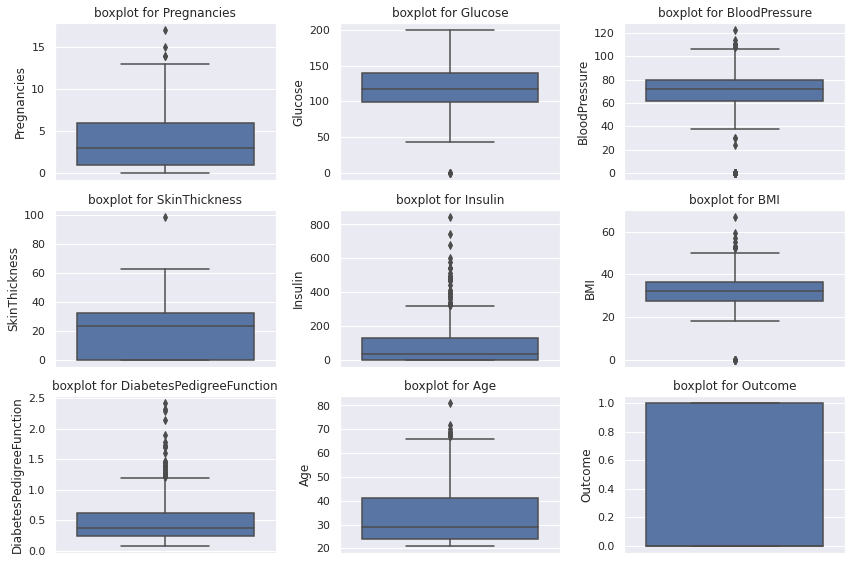

In [12]:
#boxplot
visualization(diabetes_dataset,'boxplot')

You have choosen: violinplot


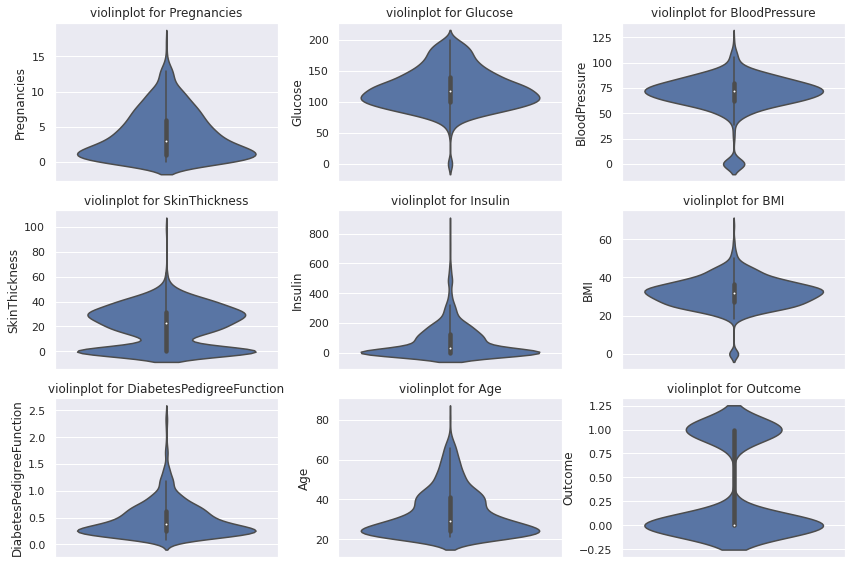

In [13]:
#boxplot
visualization(diabetes_dataset,'violinplot')

You have choosen: histogram


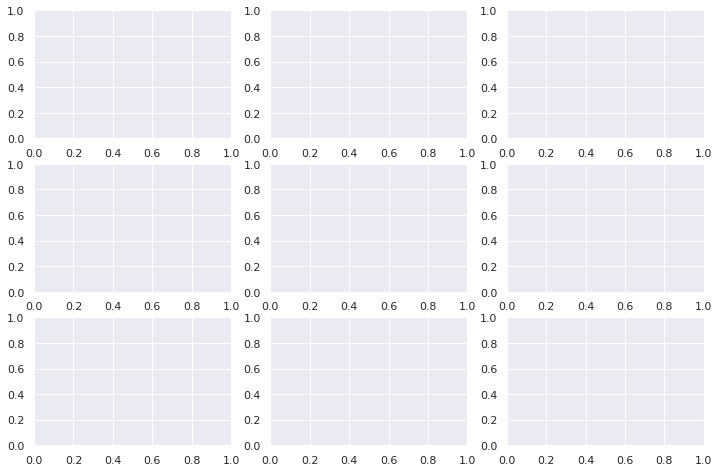

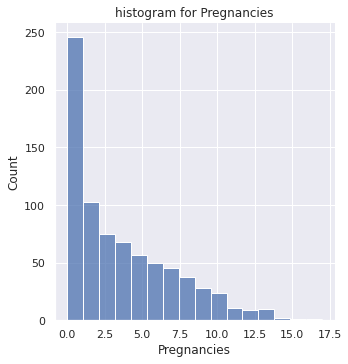

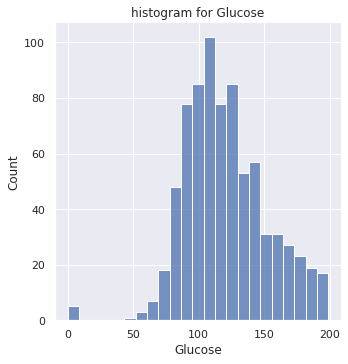

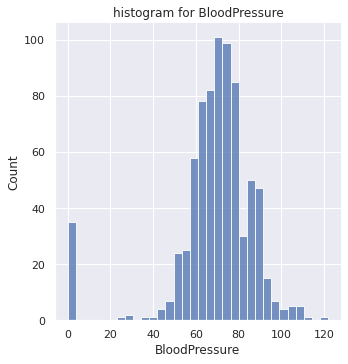

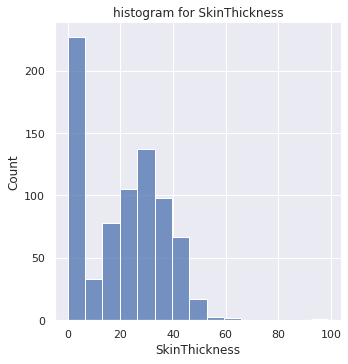

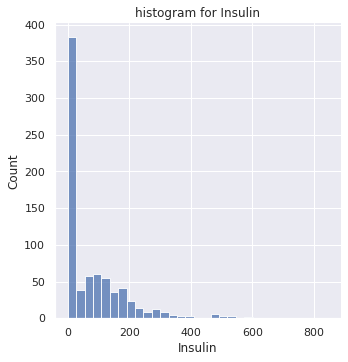

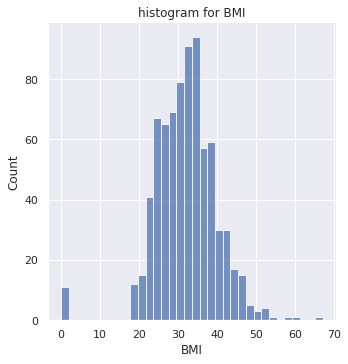

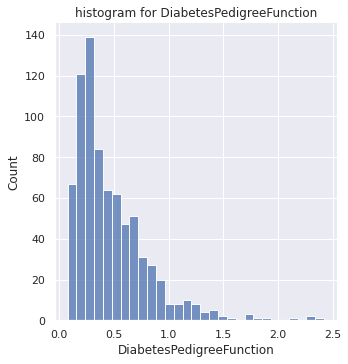

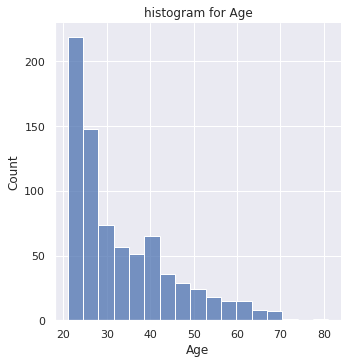

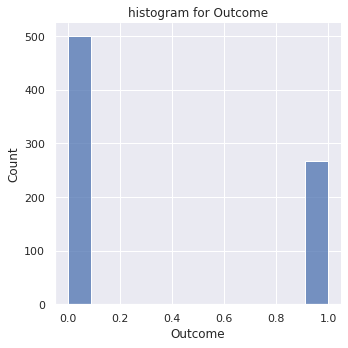

In [14]:

visualization(diabetes_dataset,'histogram')

You have choosen: kdeplot


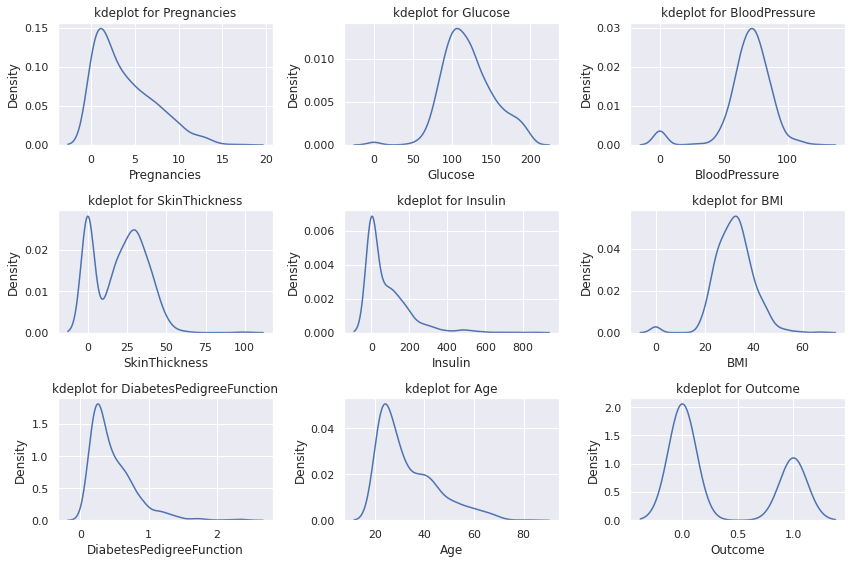

In [15]:
#boxplot
visualization(diabetes_dataset,'kdeplot')

In [16]:
#correlation
correlation = diabetes_dataset.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


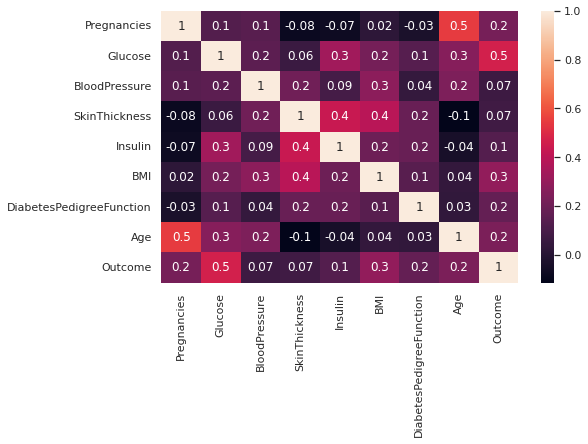

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot = True,cbar=True,fmt='.1g')
plt.show()

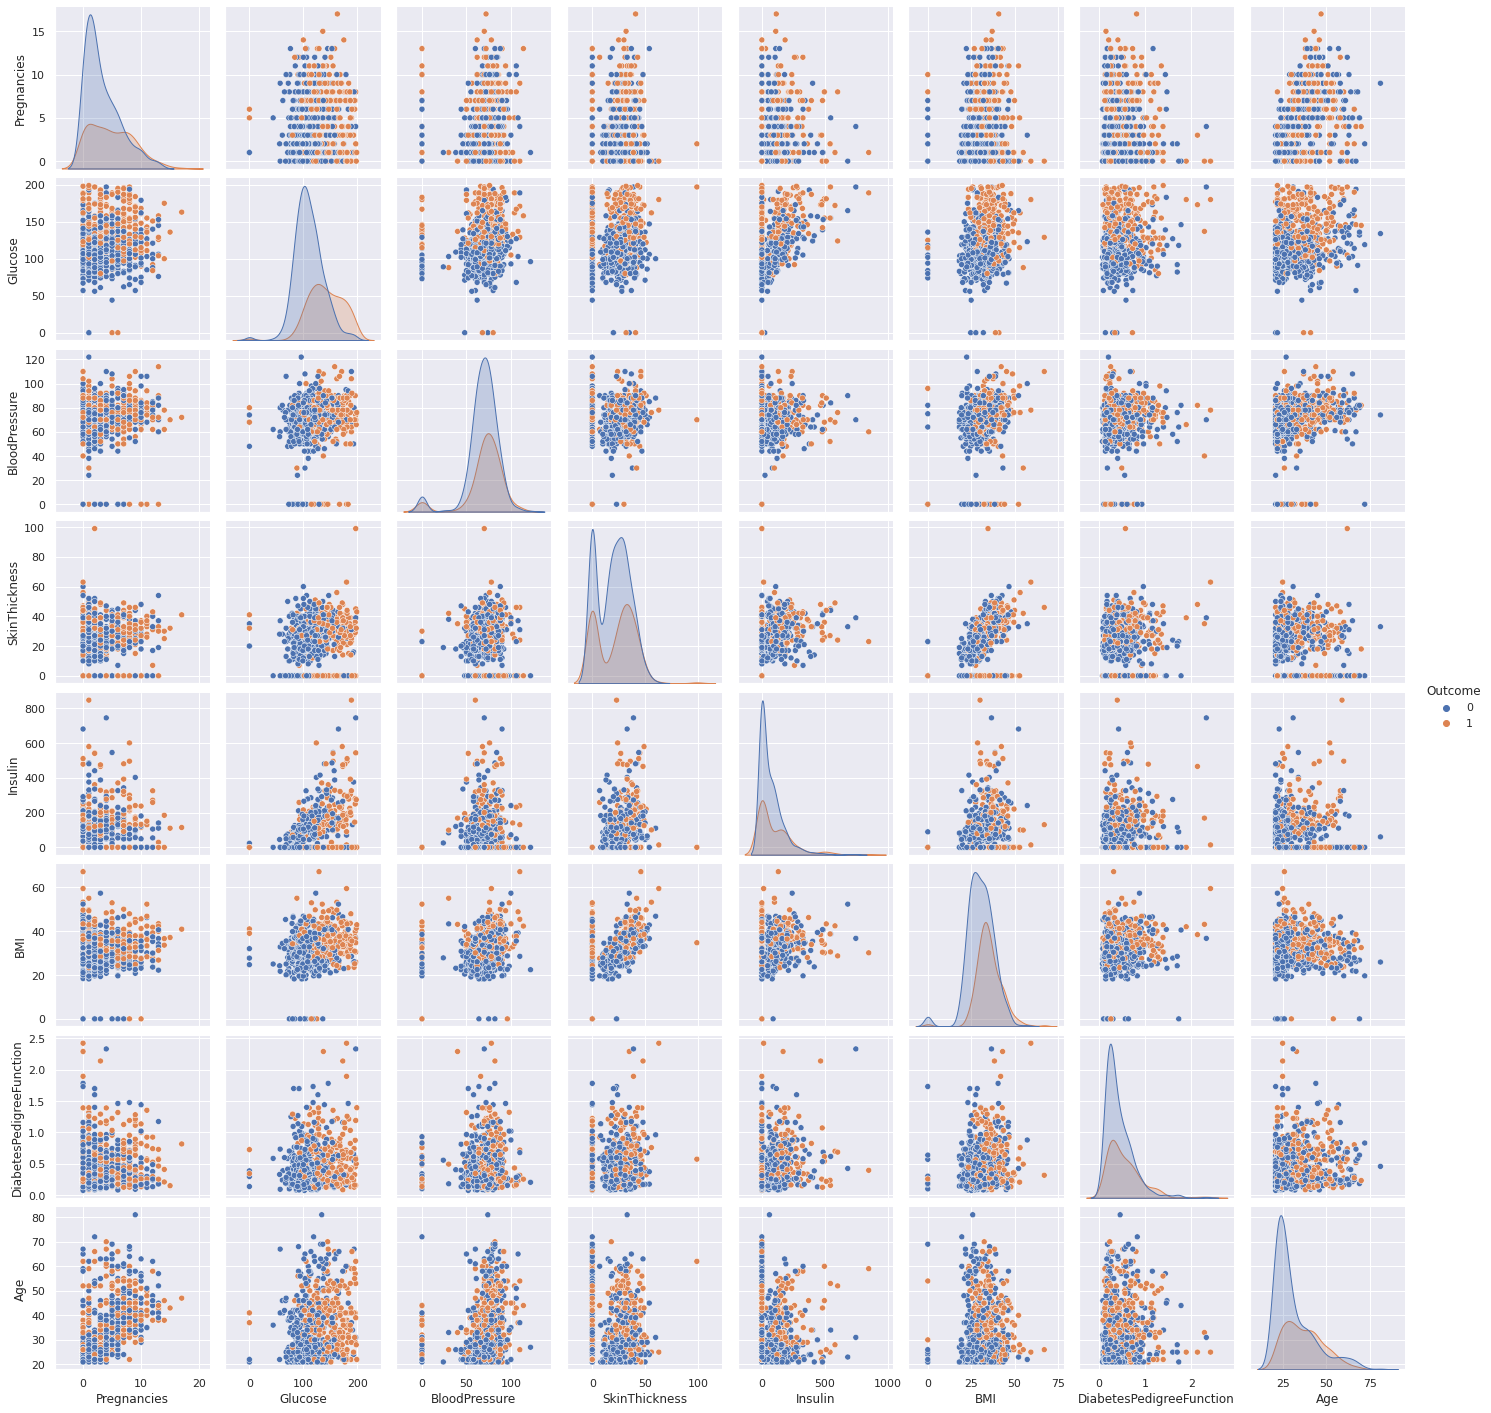

In [18]:
sns.pairplot(diabetes_dataset, hue = "Outcome")
plt.show()


121.65625

In [42]:
#Replace Glucose,BloodPressure,SkinThickness,Insulin ,BMI with median
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns:
  diabetes_dataset[column].replace(0,diabetes_dataset[column].median(),inplace = True)

  

In [43]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


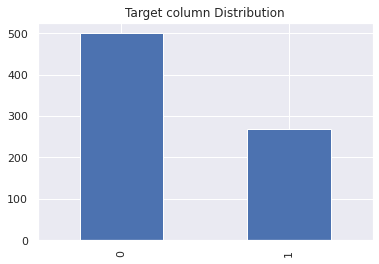

In [49]:
#target column distribution
vc = diabetes_dataset['Outcome'].value_counts()
print(vc)
vc.plot(kind = 'bar')
plt.title('Target column Distribution')
plt.show()
#imbalanced dataset

In [57]:
#train test split
features = diabetes_dataset.drop('Outcome',axis = 1)
target = diabetes_dataset['Outcome']



In [58]:
#upsampling using smote
smote = SMOTETomek(random_state = 42,n_jobs =-1)
features,target = smote.fit_resample(features,target)
print(features.shape,target.shape)

(946, 8) (946,)


1    473
0    473
Name: Outcome, dtype: int64


<AxesSubplot:>

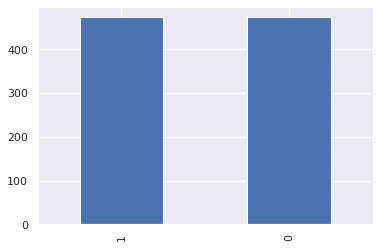

In [60]:
vcounts = target.value_counts()
print(vcounts)
vcounts.plot(kind = 'bar')
#balanced dataset

In [61]:
#split data again into train and test data
train_data,test_data,train_labels,test_labels = train_test_split(features,target,stratify = target,test_size=0.3,random_state=1)

In [63]:
print(features.shape)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(946, 8)
(662, 8)
(662,)
(284, 8)
(284,)


In [68]:
#standard scaler
scaler = StandardScaler()
trained_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [69]:
#base model logistic regression
reg_model = LogisticRegression()
reg_model.fit(trained_scaled,train_labels)
reg_prediction = reg_model.predict(test_scaled)
reg_accuracy = accuracy_score(test_labels,reg_prediction)
print('Accuracy for Regression model: ',round(reg_accuracy,2))

Accuracy for Regression model:  0.74


In [70]:
#confusion matrix
reg_confusion = confusion_matrix(test_labels,reg_prediction)
reg_confusion

array([[106,  36],
       [ 38, 104]])

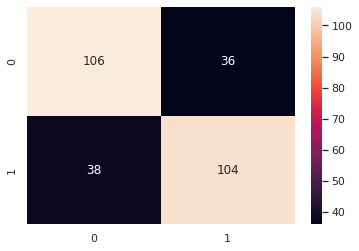

In [74]:
# heatmap
sns.heatmap(reg_confusion,annot=True,fmt = '.3g')
plt.show()

In [72]:
# other models training
models = [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),SVC(kernel='linear')]

def model_performance(model_list):
  model_results = []
  for model in model_list:
    model.fit(trained_scaled,train_labels)
    prediction = model.predict(test_scaled)
    accuracy = accuracy_score(test_labels,prediction)
    accurate = round(accuracy,2)
    model_results.append({'Model Name':str(model),'Model Accuracy':accurate})
  return pd.DataFrame(model_results)


model_performance(models)

,Model Name,Model Accuracy
0,LogisticRegression(),0.74
1,RandomForestClassifier(),0.85
2,KNeighborsClassifier(),0.78
3,SVC(kernel='linear'),0.74


In [92]:
randomforest_model = RandomForestClassifier()
randomforest_model.fit(trained_scaled,train_labels)
rf_prediction = randomforest_model.predict(test_scaled)
rf_accuracy = accuracy_score(test_labels,rf_prediction)
final_accuracy = round(rf_accuracy,2)
print('RF Accuracy: ',final_accuracy)
rf_confusion_matrix = confusion_matrix(test_labels,rf_prediction)
print(rf_confusion_matrix)

RF Accuracy:  0.85
[[115  27]
 [ 17 125]]


<AxesSubplot:>

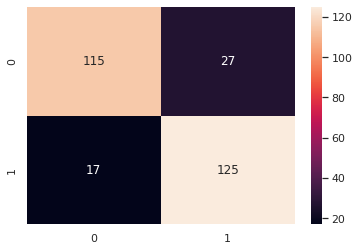

In [95]:
sns.heatmap(rf_confusion_matrix,annot=True,fmt = '.3g')

In [93]:
report = classification_report(test_labels,rf_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       142
           1       0.82      0.88      0.85       142

    accuracy                           0.85       284
   macro avg       0.85      0.85      0.84       284
weighted avg       0.85      0.85      0.84       284



In [78]:
#save model
with open('diabetes_randomforest_model.pkl','wb') as f:
  pickle.dump(randomforest_model,f)

joblib.dump(randomforest_model,'randomforest_joblib_model.pkl')



# load pickle
#with open('model.pkl', 'rb') as f:
    #clf2 = pickle.load(f)
# load joblib
#clf2 = joblib.load("model.pkl")

['randomforest_joblib_model.pkl']

In [79]:
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(84,activation ='relu',input_shape = ([8])),
    tf.keras.layers.Dense(42,activation ='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])


In [80]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 84)                756       
                                                                 
 dense_4 (Dense)             (None, 42)                3570      
                                                                 
 dense_5 (Dense)             (None, 1)                 43        
                                                                 
Total params: 4,369
Trainable params: 4,369
Non-trainable params: 0
_________________________________________________________________


In [81]:
ann_model.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics= ['accuracy'])

In [82]:
mycallback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience = 3)
model_history = ann_model.fit(trained_scaled,train_labels,epochs = 25,callbacks = [mycallback])

Epoch 1/25
21/21 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.6526
Epoch 2/25
21/21 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7538
Epoch 3/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7689
Epoch 4/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7915
Epoch 5/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7976
Epoch 6/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7915
Epoch 7/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7870
Epoch 8/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8127
Epoch 9/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8157
Epoch 10/25
21/21 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8066
Epoch 11/25
21/21 [

In [83]:
ann_df = pd.DataFrame(model_history.history)
ann_df

,loss,accuracy
0,0.641616,0.652568
1,0.522277,0.753776
2,0.478531,0.768882
3,0.458655,0.791541
4,0.445316,0.797583
5,0.435641,0.791541
6,0.428303,0.787009
7,0.422014,0.812689
8,0.413707,0.815710
9,0.408726,0.806647


<Figure size 360x360 with 0 Axes>

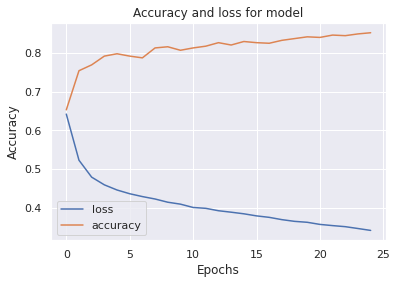

In [84]:
plt.figure(figsize=(5,5))
ann_df.plot()
plt.title('Accuracy and loss for model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [85]:
#eevaluate the model
loss,accuracy = ann_model.evaluate(test_scaled,test_labels)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

9/9 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8345
Model Loss: 0.427619993686676
Model Accuracy: 0.8345070481300354


In [86]:
prediction = ann_model.predict(test_scaled)

9/9 [==============================] - 0s 2ms/step


In [ ]:
#Outcome: To express the final result 1 is Yes and 0 is No
prediction_label_str = [ 'Diabetic' if value[0]>=0.5 else 'Not Diabetic'for value in prediction]
prediction_label_str
prediction_label_num = [1 if pred[0]>=0.5 else 0 for pred in prediction]
prediction_label_num
actual_label_str = [ 'Diabetic' if value ==1 else 'Not Diabetic'for value in test_labels]
actual_label_str

In [88]:
compare_df = pd.DataFrame({'Actual Prediction':test_labels,'Predicted value':prediction_label_num,'Actual String':actual_label_str,'Predicted String':prediction_label_str})
compare_df.head(30)

,Actual Prediction,Predicted value,Actual String,Predicted String
9,1,0,Diabetic,Not Diabetic
909,1,1,Diabetic,Diabetic
867,1,1,Diabetic,Diabetic
523,0,1,Not Diabetic,Diabetic
74,1,1,Diabetic,Diabetic
15,1,0,Diabetic,Not Diabetic
239,1,1,Diabetic,Diabetic
107,0,0,Not Diabetic,Not Diabetic
622,1,1,Diabetic,Diabetic
133,0,1,Not Diabetic,Diabetic


In [89]:
ann_confusion_m = confusion_matrix(test_labels,prediction_label_num)
ann_confusion_m

array([[116,  26],
       [ 21, 121]])